<a href="https://colab.research.google.com/github/Rahulk14/ML_LAB/blob/main/bayes_vs_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

import warnings as wrn
wrn.filterwarnings('ignore')
     

import os
for dirname, _, filenames in os.walk('/content/column_2C_weka.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
     

data = pd.read_csv("/content/column_2C_weka.csv")

In [2]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
data.tail()



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
data["class"] = [1 if each == "Normal" else 0 for each in data["class"]] 

In [7]:
data.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [8]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


In [9]:
data = (data-np.min(data)) /(np.max(data)-np.min(data))


In [10]:
data.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.0
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.0
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.0
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.0
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.0


In [11]:
from sklearn.model_selection import train_test_split
x = data.drop("class",axis=1)
y = data["class"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)
     

from sklearn.metrics import confusion_matrix
def plot_confusionMatrix(y_true,y_pred):
    cn = confusion_matrix(y_true=y_true,y_pred=y_pred)
    
    fig,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cn,annot=True,linewidths=1.5)
    plt.show()
    return cn


In [15]:
#Naive Bayes
score_list = {}
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(x_train,y_train)
nbc_score = nbc.score(x_test,y_test)
score_list["GaussianNBC"] = nbc_score

print(f"Score is {nbc_score}")

Score is 0.8172043010752689


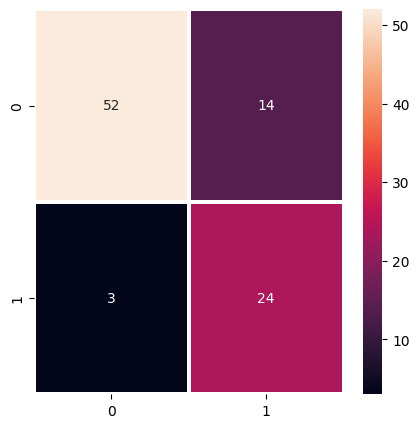

array([[52, 14],
       [ 3, 24]])

In [16]:
y_true = y_test
y_pred = nbc.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)

dtc_score = dtc.score(x_test,y_test)
score_list["DTC"] = dtc_score
print(f"Score is {dtc_score}")

Score is 0.7849462365591398


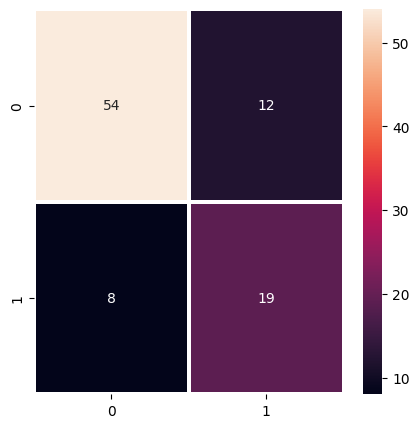

array([[54, 12],
       [ 8, 19]])

In [18]:
y_true = y_test
y_pred = dtc.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

In [19]:
#Result
score_list = list(score_list.items())

In [23]:
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")


GaussianNBC Score is 0.81 
DTC Score is 0.78 
